## Resting-State EEG Correlates of Sustained Attention in Healthy Ageing: Cross-Sectional Findings from the LEISURE Study

Created by Alicia J. Campbell, pertaining to the analysis for:

Campbell, A. J., Anijärv, T. E., Pace, T., Treacy, C., Lagopoulos, J., Hermens, D. F., Levenstein, J. M., & Andrews, S. C. (2024). [Resting-state EEG correlates of sustained attention in healthy ageing: Cross-sectional findings from the LEISURE study](https://doi.org/10.1016/j.neurobiolaging.2024.09.005). *Neurobiology of Aging*, 144, 68–77.

### EEG preprocessing and Spectral Analysis

EEG preprocessing and spectral analysis were conducted in a seperate repository. Please see: [EEG-pyline/studies Campbell_Resting_EEG_Sustained_Attention_Healthy_Ageing_Cross_Sectional_LEISURE.ipynb](https://github.com/teanijarv/EEG-pyline/blob/main/studies/Campbell_Resting_EEG_Sustained_Attention_Healthy_Ageing_Cross_Sectional_LEISURE.ipynb)

### SART d prime calculation

Participants completed the Sustained Attention to Response Task (SART) using E-Prime 2.0.10 software. Calculation of D prime measure can be found in this study folder.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import pingouin as pg
import warnings
from scipy.stats import spearmanr
from HLR import HierarchicalLinearRegression
from statsmodels.stats.multitest import multipletests

warnings.simplefilter(action='ignore', category=FutureWarning)

### Sample descriptives. 

Descriptives described in:
-  Table 1. in Supplementary Materials 

Prior to this, gender was dummy-coded (0=male and 1=female) and outlier corrections were made using the z-score standard deviation transformation method. Specifically, values with z-scores greater than 3.29 or less than -3.29 were modified to one unit above or below the nearest acceptable value. In this sample, an outlier correction was applied to a single data point in the education variable.

In [2]:
fullsample_df = pd.read_excel('data/revision_2/LEISURE_T1_SART_CANTAB_rsEEG_data_revisions_2.xlsx')
fullsample_df.describe()

,LEISURE_ID,Timepoint,Age,Gender_F,Education_years_OA,RVPA,Dprime,Alpha_CF_parietooccipital,Alpha_absoluteBP_parietooccipital,Exponent_parietooccipital,...,frontal_mae,Exponent_central,Offset_central,central_r2,central_mae,Age_Exponent_global_interaction,Age_Offset_global_interaction,Age_Alpha_CF_parietooccipital_interaction,Age_Alpha_absoluteBP_parietooccipital_interaction,Alpha_CF_parietooccipital_Exponent_global_interaction
count,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000,93.000000,93.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,93.000000,93.000000,93.000000
mean,65.739583,1.0,65.268126,0.791667,14.552083,0.903854,3.822294,9.636989,7.648419,0.903565,...,0.055530,0.852867,0.333433,0.953666,0.052433,-0.220940,-0.242469,-0.256469,-0.054528,-0.064476
std,37.922149,0.0,8.334625,0.408248,2.841867,0.041139,0.639596,1.093562,5.852001,0.211475,...,0.023861,0.211482,0.225556,0.052785,0.014454,0.957126,0.979453,0.861566,0.986350,0.958105
min,1.000000,1.0,50.162229,0.000000,9.000000,0.797800,2.099627,7.070000,1.160595,0.193287,...,0.024354,0.253992,-0.100949,0.609106,0.027333,-3.771596,-4.024613,-2.986705,-5.265370,-2.902043
25%,34.500000,1.0,59.472096,1.000000,12.000000,0.875975,3.448007,8.910000,3.659200,0.788932,...,0.042207,0.728215,0.183914,0.949941,0.041468,-0.667691,-0.644622,-0.749855,-0.503402,-0.409643
50%,64.500000,1.0,64.626996,1.000000,15.000000,0.903650,3.902521,9.660000,5.391783,0.914768,...,0.050596,0.856604,0.339838,0.969460,0.049876,-0.089885,-0.067580,-0.140272,-0.033707,-0.002173
75%,101.250000,1.0,71.592047,1.000000,17.000000,0.933600,4.239070,10.400000,9.839359,1.050885,...,0.064955,0.973027,0.456008,0.979237,0.060791,0.235837,0.273155,0.172894,0.328446,0.240490
max,130.000000,1.0,84.036269,1.000000,19.000000,0.989700,5.478745,11.850000,30.298293,1.398407,...,0.188533,1.345069,0.987071,0.994226,0.111079,2.718374,1.635783,1.904802,3.499690,2.899274


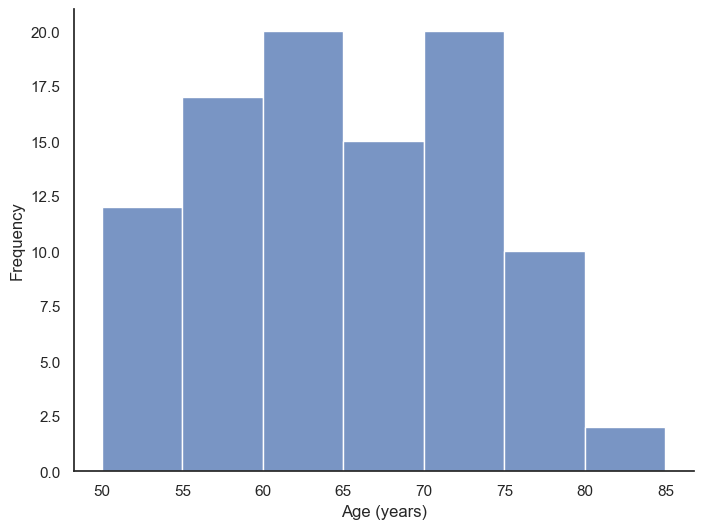

In [12]:
# Filter the DataFrame to include only ages between 50 and 85
filtered_manu_sample_df = fullsample_df[(fullsample_df['Age'] >= 50) & (fullsample_df['Age'] <= 85)]

# Create bins for the histogram
bins = range(50, 86, 5)  # You can adjust the step to your preference

sns.set_style("white")

plt.figure(figsize=(8, 6))
sns.histplot(filtered_manu_sample_df['Age'], bins=bins, kde=False, edgecolor=None)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(bins)
plt.grid(False)

sns.despine()

plt.show()

### Spearmans Correlations

Correlations reported in:

3.0 Results 
- 3.2 Bivariate correlations of demographics, sustained attention, and resting-state EEG measures 
- Figure 2.

In [3]:
selected_columns = ['Age', 'Education_years_OA', 'Dprime', 'RVPA', 'Alpha_CF_parietooccipital', 'Alpha_absoluteBP_parietooccipital', 'Exponent_global', 'Offset_global']

corr = pg.rcorr(fullsample_df[selected_columns], method='spearman', stars=False)
corr

,Age,Education_years_OA,Dprime,RVPA,Alpha_CF_parietooccipital,Alpha_absoluteBP_parietooccipital,Exponent_global,Offset_global
Age,-,0.459,0.012,0.001,0.007,0.395,0.029,0.029
Education_years_OA,-0.076,-,0.692,0.014,0.003,0.068,0.851,0.967
Dprime,-0.254,0.041,-,0.009,0.001,0.113,0.914,0.039
RVPA,-0.345,0.25,0.265,-,0.818,0.321,0.068,0.033
Alpha_CF_parietooccipital,-0.278,-0.306,0.329,0.024,-,0.289,0.489,0.802
Alpha_absoluteBP_parietooccipital,-0.089,-0.19,0.165,0.104,0.111,-,0.012,0.000
Exponent_global,-0.223,0.019,-0.011,0.187,-0.073,0.26,-,0.000
Offset_global,-0.223,0.004,0.211,0.218,0.026,0.361,0.662,-


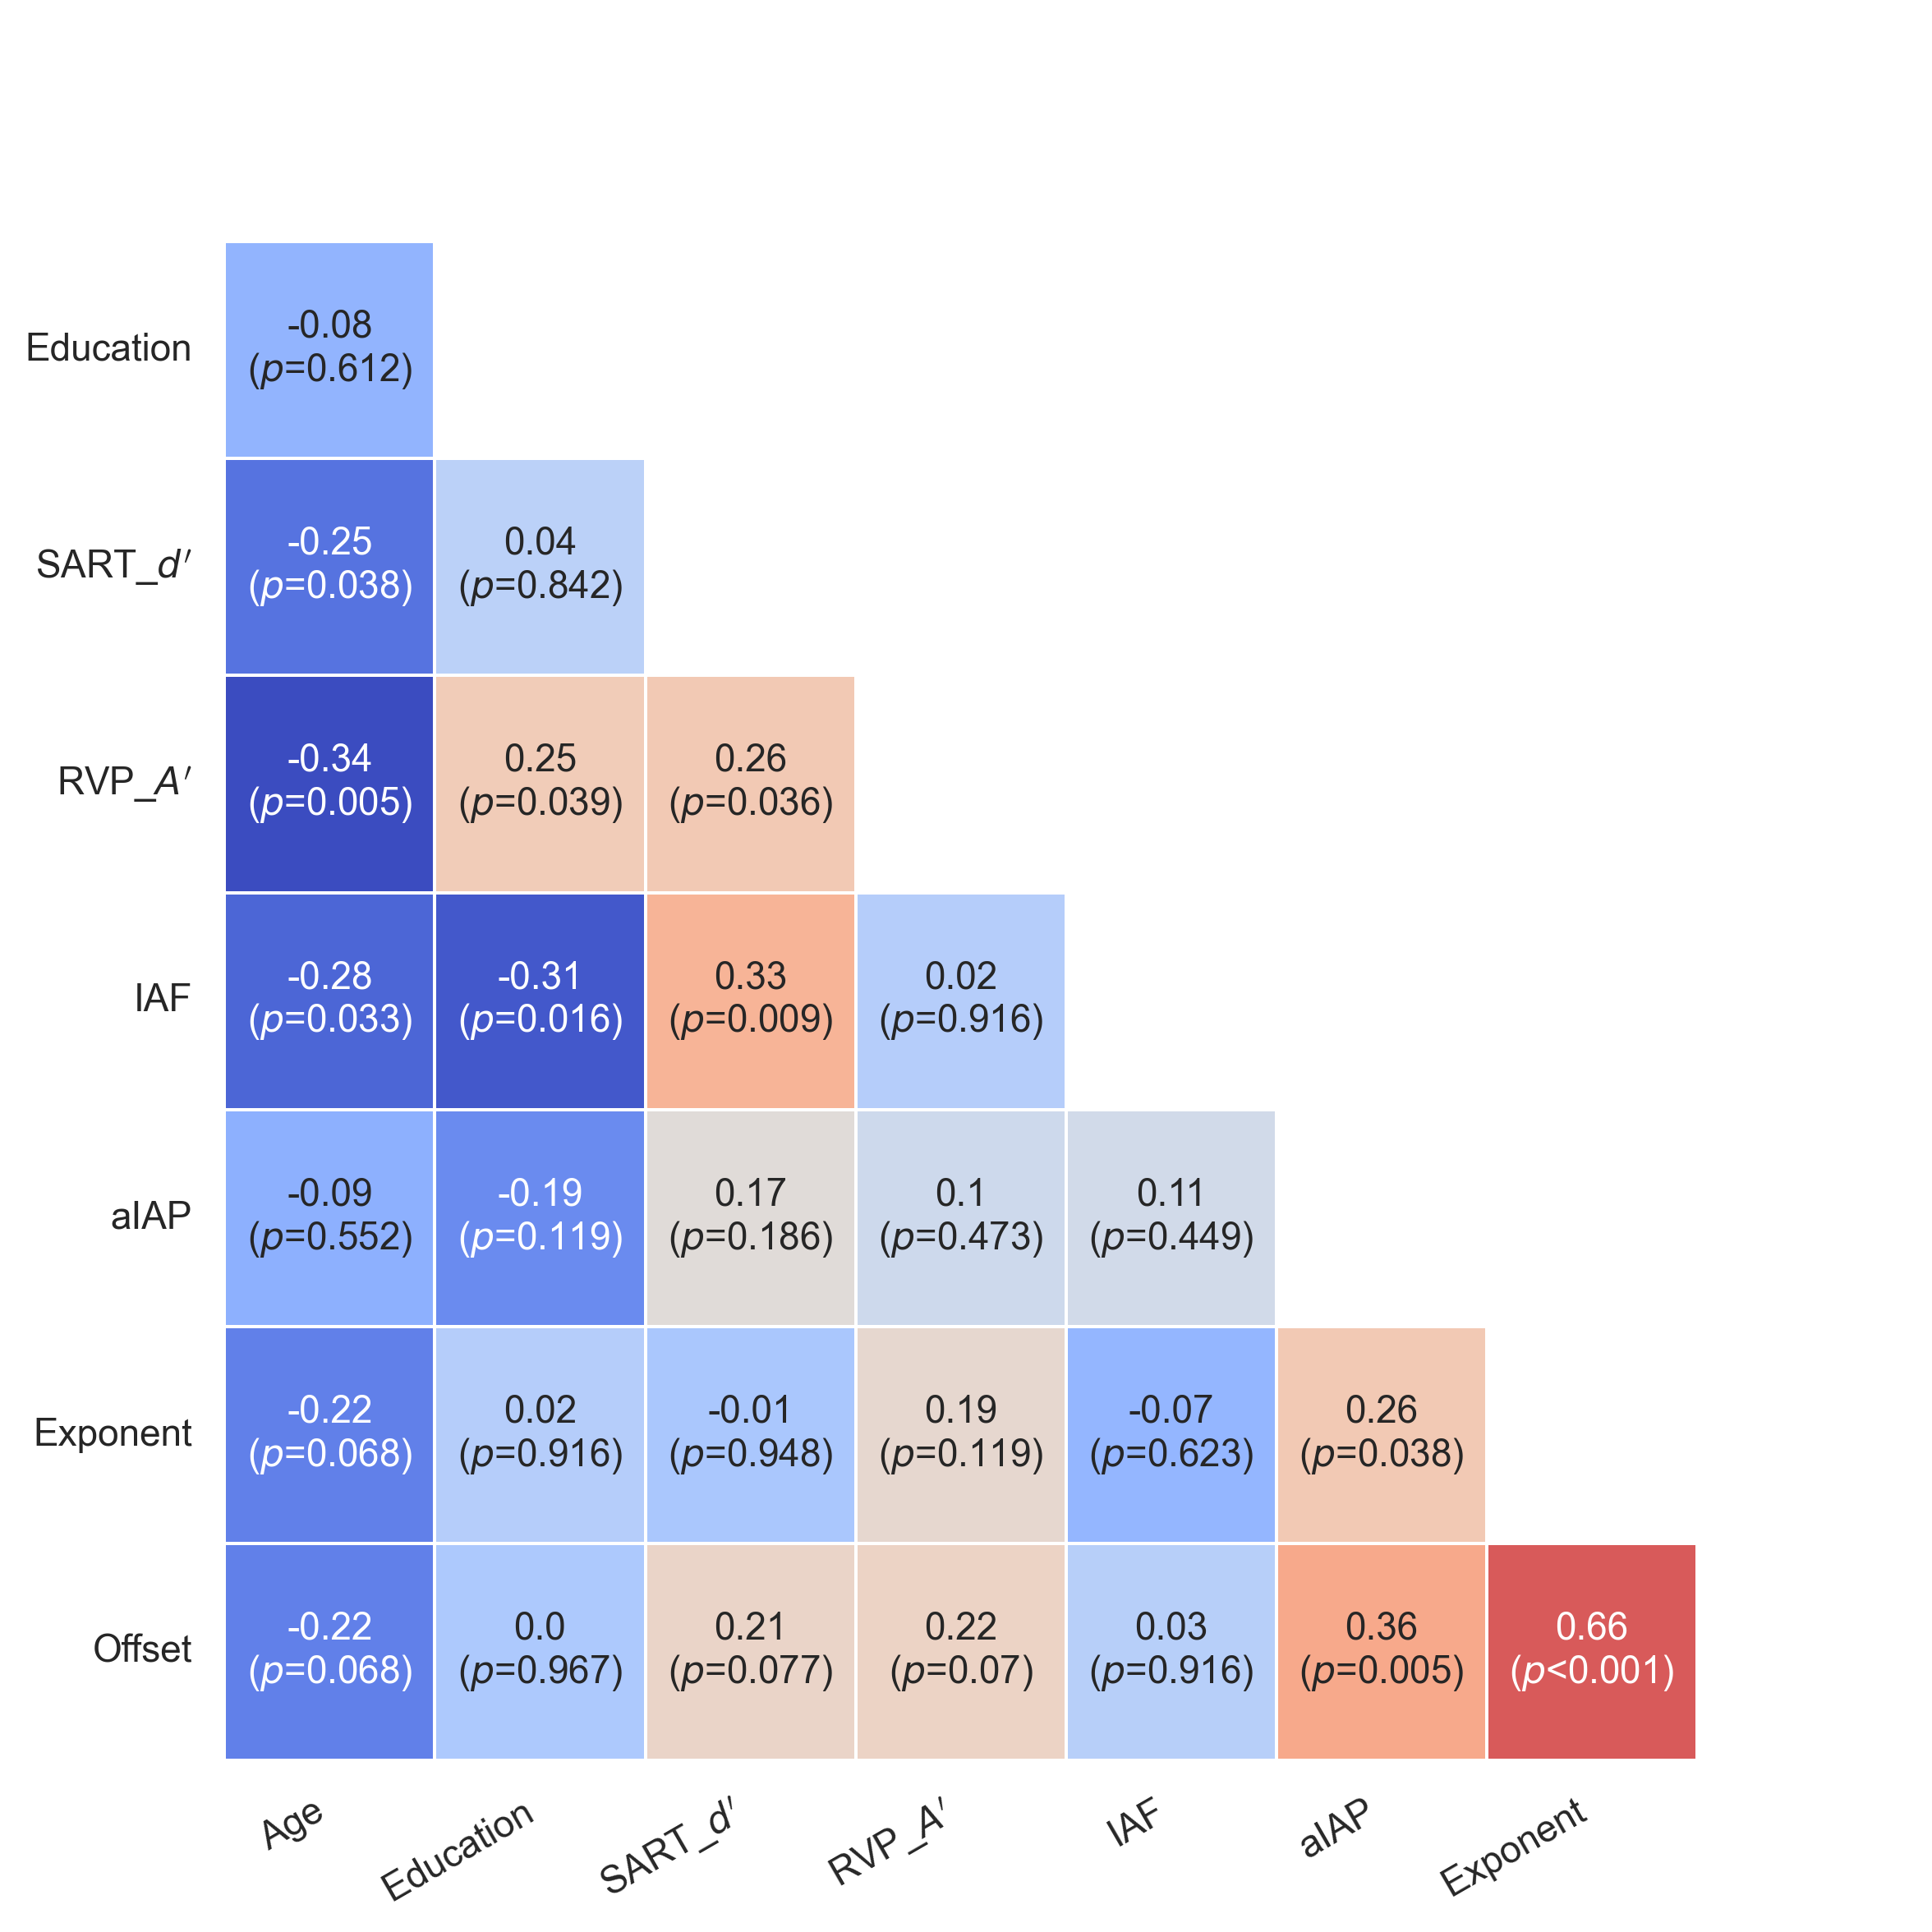

In [9]:
# Initialize the correlation and p-value matrices
correlation_matrix = pd.DataFrame(index=selected_columns, columns=selected_columns)
p_value_matrix = pd.DataFrame(index=selected_columns, columns=selected_columns)

# Store all p-values in a list to apply FDR correction later
all_p_values = []
p_value_locs = []

# Compute pairwise Spearman correlation and p-values
for col1 in selected_columns:
    for col2 in selected_columns:
        if col1 == col2:
            # Perfect correlation for diagonal
            correlation_matrix.loc[col1, col2] = 1
            p_value_matrix.loc[col1, col2] = np.nan  # No p-value for diagonal
        else:
            # Drop NaNs pairwise for the two columns
            valid_data = fullsample_df[[col1, col2]].dropna()
            
            if not valid_data.empty:  # Check if there's valid data left
                corr, p_value = spearmanr(valid_data[col1], valid_data[col2])
                correlation_matrix.loc[col1, col2] = round(corr, 2)
                p_value_matrix.loc[col1, col2] = p_value
                all_p_values.append(p_value)
                p_value_locs.append((col1, col2))  # Keep track of the location
            else:
                correlation_matrix.loc[col1, col2] = np.nan
                p_value_matrix.loc[col1, col2] = np.nan

# Apply FDR correction to the list of p-values
rejected, pvals_corrected, _, _ = multipletests(all_p_values, alpha=0.05, method='fdr_bh')

# Replace the original p-values in the matrix with the FDR-corrected p-values
for idx, (col1, col2) in enumerate(p_value_locs):
    p_value_matrix.loc[col1, col2] = pvals_corrected[idx]

# Create a DataFrame to hold both the correlation and p-values in the format you want
annot_matrix = correlation_matrix.copy()

# Iterate through the p_value_matrix and format the annotations
for col1 in selected_columns:
    for col2 in selected_columns:
        if pd.notna(p_value_matrix.loc[col1, col2]):
            if p_value_matrix.loc[col1, col2] < 0.001:
                # Replace p-values < 0.001 with the formatted string "(p<0.001)"
                annot_matrix.loc[col1, col2] = f"{correlation_matrix.loc[col1, col2]}\n" + r"($\it{p}$<0.001)"
            else:
                # For other p-values, include "(p=value)" with p in italics
                annot_matrix.loc[col1, col2] = f"{correlation_matrix.loc[col1, col2]}\n" + r"($\it{p}$=" + f"{round(p_value_matrix.loc[col1, col2], 3)})"

# Rename columns and index for better readability
renaming_dict = {
    'Education_years_OA': "Education", 
    'RVPA': r"RVP_$\it{A'}$",
    'Dprime': r"SART_$\it{d'}$",
    'Alpha_CF_parietooccipital': "IAF", 
    'Alpha_absoluteBP_parietooccipital': "aIAP", 
    'Exponent_global': "Exponent", 
    'Offset_global': "Offset"
}

# Apply renaming
correlation_matrix.rename(columns=renaming_dict, index=renaming_dict, inplace=True)
annot_matrix.rename(columns=renaming_dict, index=renaming_dict, inplace=True)

# Create a mask for the upper triangle without the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the Seaborn theme and color palette
fntsize = 11
sns.set_theme(style='white')
cmap = plt.get_cmap("coolwarm")
newcolors = cmap(np.linspace(0, 1, 100))
newcolors[99] = mpl.colors.to_rgb('#D85A5A') + (1,)
newcmap = mpl.colors.ListedColormap(newcolors)

# Generate the heatmap
plt.figure(figsize=(8, 8), dpi=300)
ax = sns.heatmap(correlation_matrix.astype(float), cmap=newcmap, fmt="", cbar=False, mask=mask, annot=annot_matrix, annot_kws={"size": fntsize}, linewidths=.5)

# Customize tick labels
xticklabels = ax.get_xticklabels()
yticklabels = ax.get_yticklabels()

xticklabels[-1] = ''
yticklabels[0] = ''

# Apply the rotation, alignment, and font size
ax.set_xticklabels(xticklabels, rotation=30, ha='right', fontsize=fntsize)
ax.set_yticklabels(yticklabels, rotation=0, fontsize=fntsize)

plt.tight_layout()
plt.show()

### Heriachical linear regressions

Regressions described in:
3.0 Results
- 3.3 Hierarchical linear regression of resting-state EEG measures and sustained attention
- Table 1
- Table 2 in Supplementary Materials

- Each regression model treated an EEG measure as the main predictor and each sustained attention performance metric, RVP_A’ and SART_d’, as the dependent variables. 

- In constructing the hierarchical regression models, age (at the time of EEG recording), gender, and years of education were controlled for in the first step. The EEG measure of interest was introduced in the second step, while the third step included the interaction between age and the EEG measure of interest. 

- Separate regression models were conducted to specifically investigate the interaction between IAF and the exponent on each sustained attention performance metric, RVP_A’ and SART_d’. Age, gender, and years of education were controlled for in the first step, with IAF and the exponent introduced in the second step, and the interaction between IAF and the exponent included in the third step. 

- Tests were assigned significance at an alpha level of less than 0.05.

- Interaction terms were calculated prior by z scoring each variable and multiplying them together

#### IAF

In [21]:
X = {
    1: ['Age', 'Gender_F', 'Education_years_OA'],
    2: ['Age', 'Gender_F', 'Education_years_OA', 'Alpha_CF_parietooccipital'], 
    3: ['Age', 'Gender_F', 'Education_years_OA', 'Alpha_CF_parietooccipital', 'Age_Alpha_CF_parietooccipital_interaction']
}

# List of DVs
target_vars = ['Dprime', 'RVPA']

# Dictionary to store summaries for each DV
summaries = {}

# Loop over each DV
for y in target_vars:
    # Extract all predictor columns from X (dict of lists)
    predictor_columns = set()
    for predictors in X.values():
        predictor_columns.update(predictors)
    
    # Add the current DV (y) to the list of columns to check for NaN
    all_columns = list(predictor_columns) + [y]
    
    # Drop rows with NaN values in the predictor or DV columns
    clean_df = fullsample_df.dropna(subset=all_columns)
    
    # Run Hierarchical Linear Regression
    model = HierarchicalLinearRegression(clean_df, X, y)
    summary_df = model.summary()
    
    # Store the summary dataframe for later display
    summaries[y] = summary_df

# Display each summary using pandas display function
for y, summary_df in summaries.items():
    print(f"Displaying summary for {y}:")
    display(summary_df)  # Display the summary_df for each DV

Displaying summary for Dprime:


,Model Level,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSR,SSTO,...,Beta coefs,P-values (beta coefs),T-values (beta coefs),Std Beta coefs,Partial correlations,Semi-partial correlations,Unique variance %,R-squared change,F-value change,P-value (F-value change)
0,1,"[Age, Gender_F, Education_years_OA]",93.0,89.0,3.0,0.058419,1.840613,0.145548,36.169525,38.413596,...,"{'const': 4.601835882261731, 'Age': -0.0172336...","{'const': 4.4527770031243597e-10, 'Age': 0.035...","{'const': 7.008600514497265, 'Age': -2.1296408...","{'Age': -0.22003474342625323, 'Gender_F': 0.07...","{'Age': -0.22020056491930065, 'Gender_F': 0.07...","{'Age': -0.21904849938782006, 'Gender_F': 0.07...","{'Age': 4.79822450840558, 'Gender_F': 0.564184...",NaN,NaN,NaN
1,2,"[Age, Gender_F, Education_years_OA, Alpha_CF_p...",93.0,88.0,4.0,0.127569,3.216905,0.016314,33.513197,38.413596,...,"{'const': 2.2018249664616145, 'Age': -0.010683...","{'const': 0.050204896240739795, 'Age': 0.19694...","{'const': 1.9854764350269998, 'Age': -1.300144...","{'Age': -0.1363993073656991, 'Gender_F': 0.047...","{'Age': -0.1372835729012411, 'Gender_F': 0.050...","{'Age': -0.12945403958642335, 'Gender_F': 0.04...","{'Age': 1.6758348365243263, 'Gender_F': 0.2194...",0.069151,6.975069,0.009779
2,3,"[Age, Gender_F, Education_years_OA, Alpha_CF_p...",93.0,87.0,5.0,0.127715,2.547607,0.033590,33.507606,38.413596,...,"{'const': 2.2140846123201032, 'Age': -0.010851...","{'const': 0.05119579638749027, 'Age': 0.198815...","{'const': 1.9771086211864142, 'Age': -1.294797...","{'Age': -0.13855398674218294, 'Gender_F': 0.04...","{'Age': -0.13749837367384177, 'Gender_F': 0.05...","{'Age': -0.1296496736763404, 'Gender_F': 0.048...","{'Age': 1.680903788438155, 'Gender_F': 0.23169...",0.000146,0.014517,0.904376


Displaying summary for RVPA:


,Model Level,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSR,SSTO,...,Beta coefs,P-values (beta coefs),T-values (beta coefs),Std Beta coefs,Partial correlations,Semi-partial correlations,Unique variance %,R-squared change,F-value change,P-value (F-value change)
0,1,"[Age, Gender_F, Education_years_OA]",93.0,89.0,3.0,0.184722,6.721727,0.000386,0.130188,0.159685,...,"{'const': 0.963348570935083, 'Age': -0.0017746...","{'const': 2.865836438600981e-41, 'Age': 0.0004...","{'const': 24.455108540616123, 'Age': -3.655305...","{'Age': -0.3514249359159675, 'Gender_F': 0.152...","{'Age': -0.3612899329697503, 'Gender_F': 0.166...","{'Age': -0.34984977218224494, 'Gender_F': 0.15...","{'Age': 12.239486309596868, 'Gender_F': 2.3237...",NaN,NaN,NaN
1,2,"[Age, Gender_F, Education_years_OA, Alpha_CF_p...",93.0,88.0,4.0,0.184773,4.986348,0.001140,0.130180,0.159685,...,"{'const': 0.9675613517020101, 'Age': -0.001786...","{'const': 4.168739583015136e-24, 'Age': 0.0007...","{'const': 13.998986494414503, 'Age': -3.487730...","{'Age': -0.3537018987105255, 'Gender_F': 0.153...","{'Age': -0.34848692680764154, 'Gender_F': 0.16...","{'Age': -0.3356918776332445, 'Gender_F': 0.152...","{'Age': 11.268903670893318, 'Gender_F': 2.3206...",0.000051,0.005533,0.940876
2,3,"[Age, Gender_F, Education_years_OA, Alpha_CF_p...",93.0,87.0,5.0,0.184777,3.943862,0.002857,0.130179,0.159685,...,"{'const': 0.9674248784489304, 'Age': -0.001784...","{'const': 9.748659113332608e-24, 'Age': 0.0009...","{'const': 13.859725539104112, 'Age': -3.415499...","{'Age': -0.35332988217810035, 'Gender_F': 0.15...","{'Age': -0.34385180198773696, 'Gender_F': 0.16...","{'Age': -0.33062277745735824, 'Gender_F': 0.15...","{'Age': 10.931142097361784, 'Gender_F': 2.2574...",0.000004,0.000463,0.982882


#### IAF x exponent interaction

In [27]:
X = {
    1: ['Age', 'Gender_F', 'Education_years_OA'],
    2: ['Age', 'Gender_F', 'Education_years_OA', 'Alpha_CF_parietooccipital', 'Exponent_global'], 
    3: ['Age', 'Gender_F', 'Education_years_OA', 'Alpha_CF_parietooccipital', 'Exponent_global', 'Alpha_CF_parietooccipital_Exponent_global_interaction']
}

target_vars = ['Dprime', 'RVPA']

summaries = {}

for y in target_vars:
    predictor_columns = set()
    for predictors in X.values():
        predictor_columns.update(predictors)
    
    all_columns = list(predictor_columns) + [y]
    
    clean_df = fullsample_df.dropna(subset=all_columns)
    
    model = HierarchicalLinearRegression(clean_df, X, y)
    summary_df = model.summary()
    
    summaries[y] = summary_df

for y, summary_df in summaries.items():
    print(f"Displaying summary for {y}:")
    display(summary_df)

Displaying summary for Dprime:


,Model Level,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSR,SSTO,...,Beta coefs,P-values (beta coefs),T-values (beta coefs),Std Beta coefs,Partial correlations,Semi-partial correlations,Unique variance %,R-squared change,F-value change,P-value (F-value change)
0,1,"[Age, Gender_F, Education_years_OA]",93.0,89.0,3.0,0.058419,1.840613,0.145548,36.169525,38.413596,...,"{'const': 4.601835882261731, 'Age': -0.0172336...","{'const': 4.4527770031243597e-10, 'Age': 0.035...","{'const': 7.008600514497265, 'Age': -2.1296408...","{'Age': -0.22003474342625323, 'Gender_F': 0.07...","{'Age': -0.22020056491930065, 'Gender_F': 0.07...","{'Age': -0.21904849938782006, 'Gender_F': 0.07...","{'Age': 4.79822450840558, 'Gender_F': 0.564184...",NaN,NaN,NaN
1,2,"[Age, Gender_F, Education_years_OA, Alpha_CF_p...",93.0,87.0,5.0,0.128714,2.570481,0.032272,33.469227,38.413596,...,"{'const': 2.375696690986622, 'Age': -0.0114868...","{'const': 0.05619432505535078, 'Age': 0.184829...","{'const': 1.935359705470116, 'Age': -1.3366260...","{'Age': -0.1466614797568345, 'Gender_F': 0.051...","{'Age': -0.14185226750448546, 'Gender_F': 0.05...","{'Age': -0.13376135393163985, 'Gender_F': 0.05...","{'Age': 1.7892099805625423, 'Gender_F': 0.2541...",0.070295,3.509581,0.034212
2,3,"[Age, Gender_F, Education_years_OA, Alpha_CF_p...",93.0,86.0,6.0,0.146082,2.452043,0.030884,32.802057,38.413596,...,"{'const': 2.132900242116689, 'Age': -0.0095372...","{'const': 0.08799736868271071, 'Age': 0.275113...","{'const': 1.7256749761670247, 'Age': -1.098359...","{'Age': -0.12176961038538907, 'Gender_F': 0.03...","{'Age': -0.11761708148609708, 'Gender_F': 0.03...","{'Age': -0.10944688313924454, 'Gender_F': 0.03...","{'Age': 1.1978620228895451, 'Gender_F': 0.1315...",0.017368,1.749178,0.189487


Displaying summary for RVPA:


,Model Level,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSR,SSTO,...,Beta coefs,P-values (beta coefs),T-values (beta coefs),Std Beta coefs,Partial correlations,Semi-partial correlations,Unique variance %,R-squared change,F-value change,P-value (F-value change)
0,1,"[Age, Gender_F, Education_years_OA]",93.0,89.0,3.0,0.184722,6.721727,0.000386,0.130188,0.159685,...,"{'const': 0.963348570935083, 'Age': -0.0017746...","{'const': 2.865836438600981e-41, 'Age': 0.0004...","{'const': 24.455108540616123, 'Age': -3.655305...","{'Age': -0.3514249359159675, 'Gender_F': 0.152...","{'Age': -0.3612899329697503, 'Gender_F': 0.166...","{'Age': -0.34984977218224494, 'Gender_F': 0.15...","{'Age': 12.239486309596868, 'Gender_F': 2.3237...",NaN,NaN,NaN
1,2,"[Age, Gender_F, Education_years_OA, Alpha_CF_p...",93.0,87.0,5.0,0.193747,4.181326,0.001880,0.128747,0.159685,...,"{'const': 0.9361716758508709, 'Age': -0.001641...","{'const': 9.970156073764849e-21, 'Age': 0.0027...","{'const': 12.296484427470322, 'Age': -3.078776...","{'Age': -0.32496716730624015, 'Gender_F': 0.14...","{'Age': -0.31344550783888075, 'Gender_F': 0.15...","{'Age': -0.29638353816067703, 'Gender_F': 0.14...","{'Age': 8.78432016926415, 'Gender_F': 1.973171...",0.009026,0.486964,0.616154
2,3,"[Age, Gender_F, Education_years_OA, Alpha_CF_p...",93.0,86.0,6.0,0.202246,3.633782,0.002918,0.127390,0.159685,...,"{'const': 0.9252210996299509, 'Age': -0.001553...","{'const': 4.3419708518496424e-20, 'Age': 0.005...","{'const': 12.01206267713101, 'Age': -2.8701298...","{'Age': -0.30755462751661317, 'Gender_F': 0.13...","{'Age': -0.2956577962715257, 'Gender_F': 0.144...","{'Age': -0.27643100171061435, 'Gender_F': 0.12...","{'Age': 7.6414098706733675, 'Gender_F': 1.6897...",0.008499,0.916200,0.341158


#### Aperiodic-adjusted alpha power

In [22]:
X = {
    1: ['Age', 'Gender_F', 'Education_years_OA'],
    2: ['Age', 'Gender_F', 'Education_years_OA', 'Alpha_absoluteBP_parietooccipital'], 
    3: ['Age', 'Gender_F', 'Education_years_OA', 'Alpha_absoluteBP_parietooccipital', 'Age_Alpha_absoluteBP_parietooccipital_interaction'] 
}

target_vars = ['Dprime', 'RVPA']

summaries = {}

for y in target_vars:
    predictor_columns = set()
    for predictors in X.values():
        predictor_columns.update(predictors)
    
    all_columns = list(predictor_columns) + [y]
    
    clean_df = fullsample_df.dropna(subset=all_columns)
    
    model = HierarchicalLinearRegression(clean_df, X, y)
    summary_df = model.summary()
    
    summaries[y] = summary_df

for y, summary_df in summaries.items():
    print(f"Displaying summary for {y}:")
    display(summary_df)

Displaying summary for Dprime:


,Model Level,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSR,SSTO,...,Beta coefs,P-values (beta coefs),T-values (beta coefs),Std Beta coefs,Partial correlations,Semi-partial correlations,Unique variance %,R-squared change,F-value change,P-value (F-value change)
0,1,"[Age, Gender_F, Education_years_OA]",93.0,89.0,3.0,0.058419,1.840613,0.145548,36.169525,38.413596,...,"{'const': 4.601835882261731, 'Age': -0.0172336...","{'const': 4.4527770031243597e-10, 'Age': 0.035...","{'const': 7.008600514497265, 'Age': -2.1296408...","{'Age': -0.22003474342625323, 'Gender_F': 0.07...","{'Age': -0.22020056491930065, 'Gender_F': 0.07...","{'Age': -0.21904849938782006, 'Gender_F': 0.07...","{'Age': 4.79822450840558, 'Gender_F': 0.564184...",NaN,NaN,NaN
1,2,"[Age, Gender_F, Education_years_OA, Alpha_abso...",93.0,88.0,4.0,0.076848,1.831383,0.129907,35.461605,38.413596,...,"{'const': 4.374506119521487, 'Age': -0.0165901...","{'const': 5.316298606816827e-09, 'Age': 0.0428...","{'const': 6.471672350427502, 'Age': -2.0551031...","{'Age': -0.21181982988567546, 'Gender_F': 0.07...","{'Age': -0.2139995908936228, 'Gender_F': 0.082...","{'Age': -0.2104888050077531, 'Gender_F': 0.079...","{'Age': 4.43055370335919, 'Gender_F': 0.634679...",0.018429,1.756743,0.188462
2,3,"[Age, Gender_F, Education_years_OA, Alpha_abso...",93.0,87.0,5.0,0.080754,1.528555,0.189259,35.311547,38.413596,...,"{'const': 4.369648258050313, 'Age': -0.0162051...","{'const': 6.3210775323798576e-09, 'Age': 0.049...","{'const': 6.4408467915191245, 'Age': -1.994120...","{'Age': -0.20690353606029774, 'Gender_F': 0.07...","{'Age': -0.2090675828954969, 'Gender_F': 0.079...","{'Age': -0.2049781714727308, 'Gender_F': 0.076...","{'Age': 4.201605078030424, 'Gender_F': 0.59086...",0.003906,0.369711,0.544746


Displaying summary for RVPA:


,Model Level,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSR,SSTO,...,Beta coefs,P-values (beta coefs),T-values (beta coefs),Std Beta coefs,Partial correlations,Semi-partial correlations,Unique variance %,R-squared change,F-value change,P-value (F-value change)
0,1,"[Age, Gender_F, Education_years_OA]",93.0,89.0,3.0,0.184722,6.721727,0.000386,0.130188,0.159685,...,"{'const': 0.963348570935083, 'Age': -0.0017746...","{'const': 2.865836438600981e-41, 'Age': 0.0004...","{'const': 24.455108540616123, 'Age': -3.655305...","{'Age': -0.3514249359159675, 'Gender_F': 0.152...","{'Age': -0.3612899329697503, 'Gender_F': 0.166...","{'Age': -0.34984977218224494, 'Gender_F': 0.15...","{'Age': 12.239486309596868, 'Gender_F': 2.3237...",NaN,NaN,NaN
1,2,"[Age, Gender_F, Education_years_OA, Alpha_abso...",93.0,88.0,4.0,0.197345,5.409042,0.000610,0.128172,0.159685,...,"{'const': 0.9512178832693954, 'Age': -0.001740...","{'const': 1.473103678978386e-39, 'Age': 0.0005...","{'const': 23.407216278047752, 'Age': -3.585810...","{'Age': -0.3446259821814233, 'Gender_F': 0.156...","{'Age': -0.3570524947907208, 'Gender_F': 0.171...","{'Age': -0.3424604353763546, 'Gender_F': 0.156...","{'Age': 11.727914979816235, 'Gender_F': 2.4384...",0.012623,1.383984,0.242596
2,3,"[Age, Gender_F, Education_years_OA, Alpha_abso...",93.0,87.0,5.0,0.215478,4.779099,0.000661,0.125277,0.159685,...,"{'const': 0.9518926845458197, 'Age': -0.001793...","{'const': 1.607055951679807e-39, 'Age': 0.0003...","{'const': 23.55633180965428, 'Age': -3.7058822...","{'Age': -0.3552179966870931, 'Gender_F': 0.162...","{'Age': -0.3692364062836691, 'Gender_F': 0.179...","{'Age': -0.35191247487383215, 'Gender_F': 0.16...","{'Age': 12.384238997182555, 'Gender_F': 2.6203...",0.018132,2.010805,0.159754


#### Exponent

In [24]:
X = {
    1: ['Age', 'Gender_F', 'Education_years_OA'],
    2: ['Age', 'Gender_F', 'Education_years_OA', 'Exponent_global'], 
    3: ['Age', 'Gender_F', 'Education_years_OA', 'Exponent_global', 'Age_Exponent_global_interaction'] 
}

target_vars = ['Dprime', 'RVPA']

summaries = {}

for y in target_vars:
    predictor_columns = set()
    for predictors in X.values():
        predictor_columns.update(predictors)
    
    all_columns = list(predictor_columns) + [y]
    
    clean_df = fullsample_df.dropna(subset=all_columns)
    
    model = HierarchicalLinearRegression(clean_df, X, y)
    summary_df = model.summary()
    
    summaries[y] = summary_df

for y, summary_df in summaries.items():
    print(f"Displaying summary for {y}:")
    display(summary_df)

Displaying summary for Dprime:


,Model Level,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSR,SSTO,...,Beta coefs,P-values (beta coefs),T-values (beta coefs),Std Beta coefs,Partial correlations,Semi-partial correlations,Unique variance %,R-squared change,F-value change,P-value (F-value change)
0,1,"[Age, Gender_F, Education_years_OA]",96.0,92.0,3.0,0.052386,1.695327,0.173487,36.827053,38.86294,...,"{'const': 4.5422421780472675, 'Age': -0.015713...","{'const': 3.8088249995418107e-10, 'Age': 0.047...","{'const': 7.014567096467986, 'Age': -2.0077033...","{'Age': -0.20475979770770317, 'Gender_F': 0.04...","{'Age': -0.20487742583040955, 'Gender_F': 0.04...","{'Age': -0.20376110566793412, 'Gender_F': 0.04...","{'Age': 4.151858818301902, 'Gender_F': 0.23697...",NaN,NaN,NaN
1,2,"[Age, Gender_F, Education_years_OA, Exponent_g...",96.0,91.0,4.0,0.056890,1.372322,0.249745,36.652023,38.86294,...,"{'const': 4.792092711154585, 'Age': -0.0168990...","{'const': 7.520078599847204e-09, 'Age': 0.0386...","{'const': 6.372168800537352, 'Age': -2.0981998...","{'Age': -0.2202133063238796, 'Gender_F': 0.053...","{'Age': -0.2148162416114339, 'Gender_F': 0.055...","{'Age': -0.213602983107901, 'Gender_F': 0.0537...","{'Age': 4.562623439259424, 'Gender_F': 0.28925...",0.004504,0.434566,0.511422
2,3,"[Age, Gender_F, Education_years_OA, Exponent_g...",96.0,90.0,5.0,0.079207,1.548361,0.182911,35.784735,38.86294,...,"{'const': 4.711276375518012, 'Age': -0.0162915...","{'const': 1.1304922915199642e-08, 'Age': 0.044...","{'const': 6.28839490435442, 'Age': -2.03316404...","{'Age': -0.2122958988740268, 'Gender_F': 0.040...","{'Age': -0.20955582023658836, 'Gender_F': 0.04...","{'Age': -0.20565166937143217, 'Gender_F': 0.04...","{'Age': 4.229260911525685, 'Gender_F': 0.16339...",0.022317,2.181264,0.143190


Displaying summary for RVPA:


,Model Level,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSR,SSTO,...,Beta coefs,P-values (beta coefs),T-values (beta coefs),Std Beta coefs,Partial correlations,Semi-partial correlations,Unique variance %,R-squared change,F-value change,P-value (F-value change)
0,1,"[Age, Gender_F, Education_years_OA]",96.0,92.0,3.0,0.178533,6.664916,0.000402,0.132077,0.160781,...,"{'const': 0.9611228038545246, 'Age': -0.001661...","{'const': 1.6984019435903864e-42, 'Age': 0.000...","{'const': 24.784490245346465, 'Age': -3.544782...","{'Age': -0.3366000648494925, 'Gender_F': 0.129...","{'Age': -0.34665338174116384, 'Gender_F': 0.14...","{'Age': -0.33495833727838914, 'Gender_F': 0.12...","{'Age': 11.219708771230309, 'Gender_F': 1.6829...",NaN,NaN,NaN
1,2,"[Age, Gender_F, Education_years_OA, Exponent_g...",96.0,91.0,4.0,0.189106,5.305470,0.000692,0.130377,0.160781,...,"{'const': 0.93649917263771, 'Age': -0.00154456...","{'const': 1.808325065874034e-36, 'Age': 0.0018...","{'const': 20.879429641353862, 'Age': -3.215425...","{'Age': -0.3129218547390617, 'Gender_F': 0.121...","{'Age': -0.31941124250428105, 'Gender_F': 0.13...","{'Age': -0.30352862307790995, 'Gender_F': 0.12...","{'Age': 9.212962502757193, 'Gender_F': 1.47094...",0.010574,1.186581,0.278897
2,3,"[Age, Gender_F, Education_years_OA, Exponent_g...",96.0,90.0,5.0,0.189684,4.213550,0.001736,0.130284,0.160781,...,"{'const': 0.9373352561267749, 'Age': -0.001550...","{'const': 4.866511975004407e-36, 'Age': 0.0018...","{'const': 20.734803946076, 'Age': -3.207630363...","{'Age': -0.3141953092650342, 'Gender_F': 0.123...","{'Age': -0.32030070754189294, 'Gender_F': 0.13...","{'Age': -0.30436193163283176, 'Gender_F': 0.12...","{'Age': 9.263618542726855, 'Gender_F': 1.51110...",0.000577,0.064123,0.800671


#### Offset

In [26]:
X = {
    1: ['Age', 'Gender_F', 'Education_years_OA'],
    2: ['Age', 'Gender_F', 'Education_years_OA', 'Offset_global'], 
    3: ['Age', 'Gender_F', 'Education_years_OA', 'Offset_global', 'Age_Offset_global_interaction']
}

target_vars = ['Dprime', 'RVPA']

summaries = {}

for y in target_vars:
    predictor_columns = set()
    for predictors in X.values():
        predictor_columns.update(predictors)
    
    all_columns = list(predictor_columns) + [y]
    
    clean_df = fullsample_df.dropna(subset=all_columns)
    
    model = HierarchicalLinearRegression(clean_df, X, y)
    summary_df = model.summary()
    
    summaries[y] = summary_df

for y, summary_df in summaries.items():
    print(f"Displaying summary for {y}:")
    display(summary_df)

Displaying summary for Dprime:


,Model Level,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSR,SSTO,...,Beta coefs,P-values (beta coefs),T-values (beta coefs),Std Beta coefs,Partial correlations,Semi-partial correlations,Unique variance %,R-squared change,F-value change,P-value (F-value change)
0,1,"[Age, Gender_F, Education_years_OA]",96.0,92.0,3.0,0.052386,1.695327,0.173487,36.827053,38.86294,...,"{'const': 4.5422421780472675, 'Age': -0.015713...","{'const': 3.8088249995418107e-10, 'Age': 0.047...","{'const': 7.014567096467986, 'Age': -2.0077033...","{'Age': -0.20475979770770317, 'Gender_F': 0.04...","{'Age': -0.20487742583040955, 'Gender_F': 0.04...","{'Age': -0.20376110566793412, 'Gender_F': 0.04...","{'Age': 4.151858818301902, 'Gender_F': 0.23697...",NaN,NaN,NaN
1,2,"[Age, Gender_F, Education_years_OA, Offset_glo...",96.0,91.0,4.0,0.064576,1.570528,0.188878,36.353317,38.86294,...,"{'const': 4.279543549376658, 'Age': -0.0134858...","{'const': 1.6385421826454698e-08, 'Age': 0.098...","{'const': 6.198575395635385, 'Age': -1.6686930...","{'Age': -0.17573487213040886, 'Gender_F': 0.02...","{'Age': -0.17231013827969913, 'Gender_F': 0.02...","{'Age': -0.16918425760938013, 'Gender_F': 0.02...","{'Age': 2.8623313022837102, 'Gender_F': 0.0703...",0.012190,1.185859,0.279042
2,3,"[Age, Gender_F, Education_years_OA, Offset_glo...",96.0,90.0,5.0,0.076880,1.499083,0.198041,35.875171,38.86294,...,"{'const': 4.262676965019665, 'Age': -0.0132377...","{'const': 1.8381455096767e-08, 'Age': 0.104672...","{'const': 6.179370035251255, 'Age': -1.6391514...","{'Age': -0.17250266902274267, 'Gender_F': 0.02...","{'Age': -0.17025900780220235, 'Gender_F': 0.02...","{'Age': -0.16600722547794394, 'Gender_F': 0.02...","{'Age': 2.7558398910884923, 'Gender_F': 0.0613...",0.012303,1.199526,0.276339


Displaying summary for RVPA:


,Model Level,Predictors,N (observations),DF (residuals),DF (model),R-squared,F-value,P-value (F),SSR,SSTO,...,Beta coefs,P-values (beta coefs),T-values (beta coefs),Std Beta coefs,Partial correlations,Semi-partial correlations,Unique variance %,R-squared change,F-value change,P-value (F-value change)
0,1,"[Age, Gender_F, Education_years_OA]",96.0,92.0,3.0,0.178533,6.664916,0.000402,0.132077,0.160781,...,"{'const': 0.9611228038545246, 'Age': -0.001661...","{'const': 1.6984019435903864e-42, 'Age': 0.000...","{'const': 24.784490245346465, 'Age': -3.544782...","{'Age': -0.3366000648494925, 'Gender_F': 0.129...","{'Age': -0.34665338174116384, 'Gender_F': 0.14...","{'Age': -0.33495833727838914, 'Gender_F': 0.12...","{'Age': 11.219708771230309, 'Gender_F': 1.6829...",NaN,NaN,NaN
1,2,"[Age, Gender_F, Education_years_OA, Offset_glo...",96.0,91.0,4.0,0.185794,5.191319,0.000820,0.130909,0.160781,...,"{'const': 0.9480822018818269, 'Age': -0.001550...","{'const': 1.6162177832303718e-39, 'Age': 0.001...","{'const': 22.883757238742596, 'Age': -3.197869...","{'Age': -0.3141994003144033, 'Gender_F': 0.113...","{'Age': -0.31784395883906114, 'Gender_F': 0.12...","{'Age': -0.3024874439494164, 'Gender_F': 0.110...","{'Age': 9.149865374705133, 'Gender_F': 1.23000...",0.007261,0.811497,0.370056
2,3,"[Age, Gender_F, Education_years_OA, Offset_glo...",96.0,90.0,5.0,0.189342,4.204194,0.001765,0.130339,0.160781,...,"{'const': 0.9486648416725967, 'Age': -0.001559...","{'const': 3.472161752511347e-39, 'Age': 0.0018...","{'const': 22.815760828820913, 'Age': -3.203552...","{'Age': -0.31593528789230213, 'Gender_F': 0.11...","{'Age': -0.3199351939865937, 'Gender_F': 0.123...","{'Age': -0.3040390091973656, 'Gender_F': 0.111...","{'Age': 9.243971911371576, 'Gender_F': 1.25069...",0.003549,0.393982,0.531803


### Regression Plots

#### Regression plot for Figure 3 of significant HLR

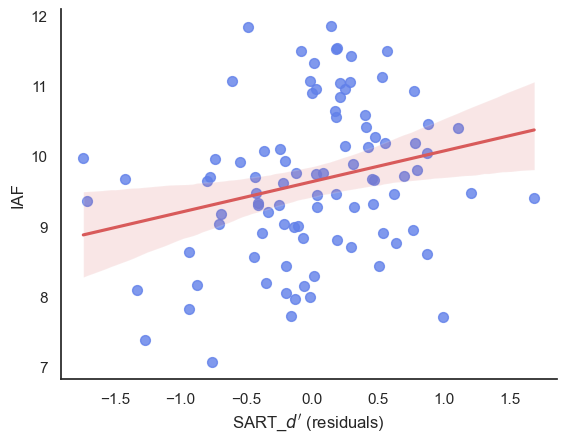

In [10]:
# Regress Dprime on covariates and get residuals (independent variable)
X = fullsample_df[['Age', 'Education_years_OA', 'Gender_F']]
X = sm.add_constant(X)  # Add constant term for the intercept
x = fullsample_df['Dprime']
model_x = sm.OLS(x, X).fit()
x_resid = model_x.resid  # Residuals of Dprime

# Use raw Alpha_CF_parietooccipital (dependent variable)
y_raw = fullsample_df['Alpha_CF_parietooccipital']

# Create a DataFrame with residuals of Dprime and raw Alpha_CF_parietooccipital
residuals_df = pd.DataFrame({'x_resid': x_resid, 'y_raw': y_raw})

# Plot the residuals of Dprime against raw Alpha_CF_parietooccipital
sns.set_style("white")
sns.regplot(x='x_resid', y='y_raw', data=residuals_df, 
            scatter_kws={'s': 50, 'color': '#6180e9'},    # Set color of dots
            line_kws={'color': '#D85A5A'})                # Set color of regression line

plt.xlabel(r"SART_$\it{d'}$ (residuals)", fontsize=12)
plt.ylabel('IAF', fontsize=12)
sns.despine()

plt.show()

#### Regression plots for Supplementary Materials

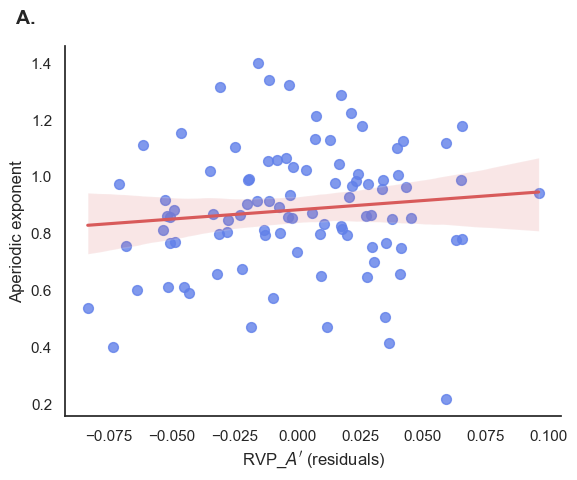

In [14]:
y_raw = fullsample_df['Exponent_global']

X = fullsample_df[['Age', 'Education_years_OA', 'Gender_F']]
X = sm.add_constant(X)  
x = fullsample_df['RVPA']
model_x = sm.OLS(x, X).fit()
x_resid = model_x.resid  

residuals_df = pd.DataFrame({'x_resid': x_resid, 'y_raw': y_raw})

sns.regplot(x='x_resid', y='y_raw', data=residuals_df, 
            scatter_kws={'s': 50, 'color': '#6180e9'},    
            line_kws={'color': '#D85A5A'})                
plt.xlabel(r"RVP_$\it{A'}$ (residuals)", fontsize=12)
plt.ylabel('Aperiodic exponent', fontsize=12)
plt.text(-0.1, 1.1, 'A.', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

sns.despine()

plt.show()

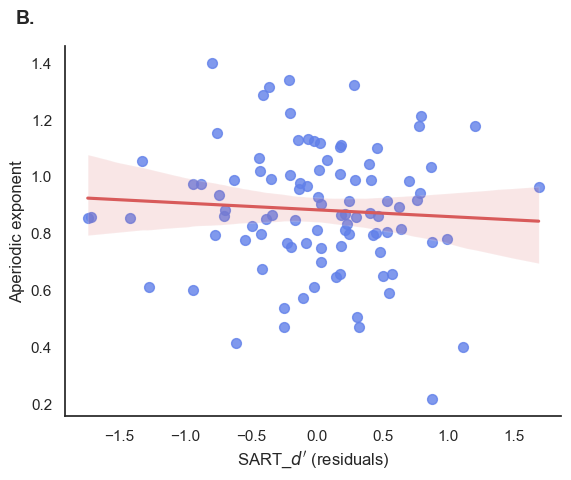

In [15]:
y_raw = fullsample_df['Exponent_global']

X = fullsample_df[['Age', 'Education_years_OA', 'Gender_F']]
X = sm.add_constant(X)  
x = fullsample_df['Dprime']
model_x = sm.OLS(x, X).fit()
x_resid = model_x.resid  

residuals_df = pd.DataFrame({'x_resid': x_resid, 'y_raw': y_raw})

sns.set_style("white")
sns.regplot(x='x_resid', y='y_raw', data=residuals_df, 
            scatter_kws={'s': 50, 'color': '#6180e9'},    
            line_kws={'color': '#D85A5A'})                
plt.xlabel(r"SART_$\it{d'}$ (residuals)", fontsize=12)
plt.ylabel('Aperiodic exponent', fontsize=12)
plt.text(-0.1, 1.1, 'B.', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

sns.despine()

plt.show()

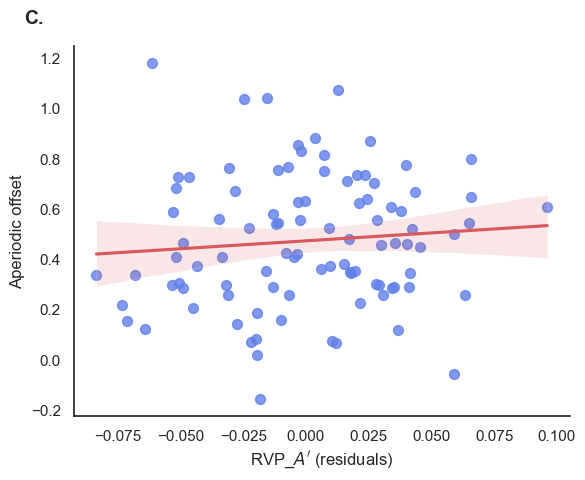

In [16]:
y_raw = fullsample_df['Offset_global']

X = fullsample_df[['Age', 'Education_years_OA', 'Gender_F']]
X = sm.add_constant(X)  
x = fullsample_df['RVPA']
model_x = sm.OLS(x, X).fit()
x_resid = model_x.resid  

residuals_df = pd.DataFrame({'x_resid': x_resid, 'y_raw': y_raw})

sns.regplot(x='x_resid', y='y_raw', data=residuals_df, 
            scatter_kws={'s': 50, 'color': '#6180e9'},    
            line_kws={'color': '#D85A5A'})                
plt.xlabel(r"RVP_$\it{A'}$ (residuals)", fontsize=12)
plt.ylabel('Aperiodic offset', fontsize=12)
plt.text(-0.1, 1.1, 'C.', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

sns.despine()

plt.show()

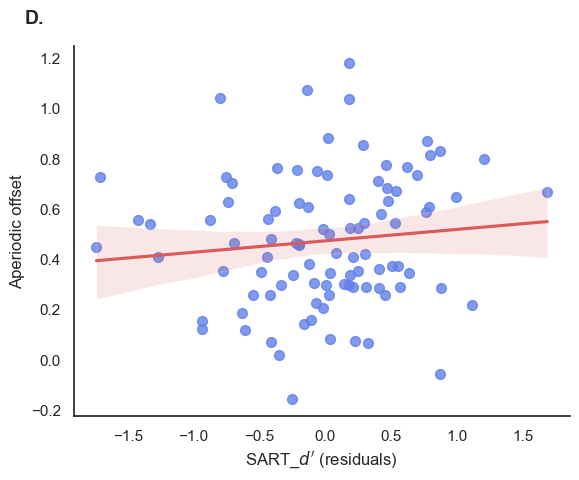

In [17]:
y_raw = fullsample_df['Offset_global']

X = fullsample_df[['Age', 'Education_years_OA', 'Gender_F']]
X = sm.add_constant(X)  
x = fullsample_df['Dprime']
model_x = sm.OLS(x, X).fit()
x_resid = model_x.resid  

residuals_df = pd.DataFrame({'x_resid': x_resid, 'y_raw': y_raw})

sns.regplot(x='x_resid', y='y_raw', data=residuals_df, 
            scatter_kws={'s': 50, 'color': '#6180e9'},    
            line_kws={'color': '#D85A5A'})                
plt.xlabel(r"SART_$\it{d'}$ (residuals)", fontsize=12)
plt.ylabel('Aperiodic offset', fontsize=12)
plt.text(-0.1, 1.1, 'D.', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

sns.despine()

plt.show()

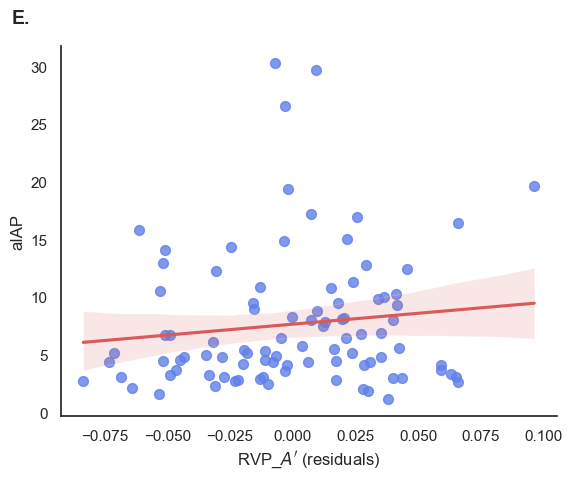

In [18]:
y_raw = fullsample_df['Alpha_absoluteBP_parietooccipital']

X = fullsample_df[['Age', 'Education_years_OA', 'Gender_F']]
X = sm.add_constant(X)  
x = fullsample_df['RVPA']
model_x = sm.OLS(x, X).fit()
x_resid = model_x.resid  

residuals_df = pd.DataFrame({'x_resid': x_resid, 'y_raw': y_raw})

sns.set_style("white")
sns.regplot(x='x_resid', y='y_raw', data=residuals_df, 
            scatter_kws={'s': 50, 'color': '#6180e9'},    
            line_kws={'color': '#D85A5A'})                
plt.xlabel(r"RVP_$\it{A'}$ (residuals)", fontsize=12)
plt.ylabel('aIAP', fontsize=12)
plt.text(-0.1, 1.1, 'E.', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

sns.despine()

plt.show()

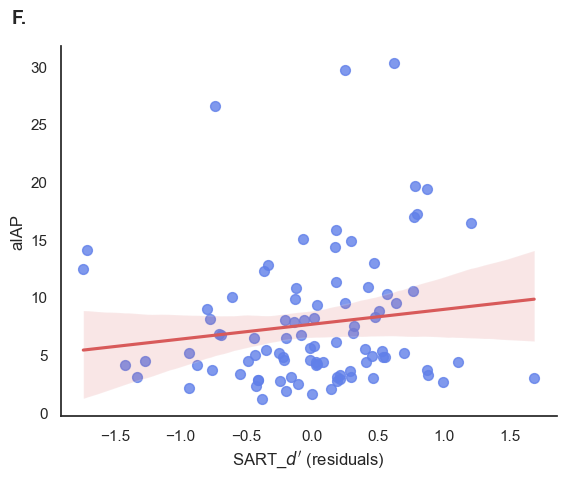

In [19]:
y_raw = fullsample_df['Alpha_absoluteBP_parietooccipital']

X = fullsample_df[['Age', 'Education_years_OA', 'Gender_F']]
X = sm.add_constant(X)  
x = fullsample_df['Dprime']
model_x = sm.OLS(x, X).fit()
x_resid = model_x.resid  

residuals_df = pd.DataFrame({'x_resid': x_resid, 'y_raw': y_raw})

sns.set_style("white")
sns.regplot(x='x_resid', y='y_raw', data=residuals_df, 
            scatter_kws={'s': 50, 'color': '#6180e9'},    
            line_kws={'color': '#D85A5A'})                
plt.xlabel(r"SART_$\it{d'}$ (residuals)", fontsize=12)
plt.ylabel('aIAP', fontsize=12)
plt.text(-0.1, 1.1, 'F.', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

sns.despine()

plt.show()

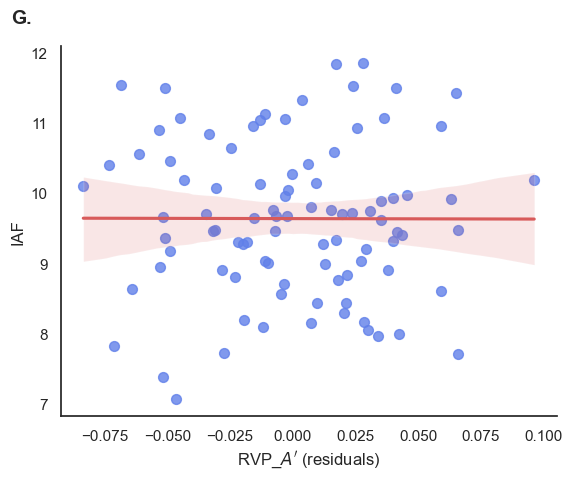

In [20]:
y_raw = fullsample_df['Alpha_CF_parietooccipital']

X = fullsample_df[['Age', 'Education_years_OA', 'Gender_F']]
X = sm.add_constant(X)  
x = fullsample_df['RVPA']
model_x = sm.OLS(x, X).fit()
x_resid = model_x.resid  

residuals_df = pd.DataFrame({'x_resid': x_resid, 'y_raw': y_raw})

sns.set_style("white")
sns.regplot(x='x_resid', y='y_raw', data=residuals_df, 
            scatter_kws={'s': 50, 'color': '#6180e9'},    
            line_kws={'color': '#D85A5A'})                
plt.xlabel(r"RVP_$\it{A'}$ (residuals)", fontsize=12)
plt.ylabel('IAF', fontsize=12)
plt.text(-0.1, 1.1, 'G.', transform=plt.gca().transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

sns.despine()

plt.show()

### Mediation analysis

Mediation analysis described in:

3.0 Results
- 3.4 Mediation analysis

was completed in R. The code and output for this have been included in the folder for this study.